In [51]:
＃Reference:
        #  UWMGI: Mask Data: https://www.kaggle.com/code/awsaf49/uwmgi-mask-data
        #  UWMGI: 2.5D stride=2 Data: https://www.kaggle.com/code/awsaf49/uwmgi-2-5d-stride-2-data

In [2]:
import numpy as np
import pandas as pd
from glob import glob

# part1: Generate 2.5D data for train
 

In [44]:
df = pd.read_csv('../input/uwmgi-mask-dataset/train.csv')
df = pd.read_csv('../input/uwmgi-mask-dataset/train.csv')
df['segmentation'] = df.segmentation.fillna('')
df['rle_len'] = df.segmentation.map(len) # length of each rle mask

df['image_path'] = df.image_path.str.replace('/kaggle/','../') 
df['mask_path'] = df.mask_path.str.replace('/kaggle/','../')

df['mask_path'] = df.mask_path.str.replace('/png/','/np').str.replace('.png','.npy')

df2 = df.groupby(['id'])['segmentation'].agg(list).to_frame().reset_index() # rle list of each id
df2 = df2.merge(df.groupby(['id'])['rle_len'].agg(sum).to_frame().reset_index()) # total length of all rles of each id

df = df.drop(columns=['segmentation', 'class', 'rle_len'])
df = df.groupby(['id']).head(1).reset_index(drop=True)
df = df.merge(df2, on=['id'])
df['empty'] = (df.rle_len==0) # empty masks
display(df)

/tmp/ipykernel_227579/3427083957.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['mask_path'] = df.mask_path.str.replace('/png/','/np').str.replace('.png','.npy')


,id,case,day,slice,image_path,height,width,mask_path,segmentation,rle_len,empty
0,case123_day20_slice_0001,123,20,1,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True
1,case123_day20_slice_0002,123,20,2,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True
2,case123_day20_slice_0003,123,20,3,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True
3,case123_day20_slice_0004,123,20,4,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True
4,case123_day20_slice_0005,123,20,5,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True
...,...,...,...,...,...,...,...,...,...,...,...
38491,case30_day0_slice_0140,30,0,140,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True
38492,case30_day0_slice_0141,30,0,141,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True
38493,case30_day0_slice_0142,30,0,142,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True
38494,case30_day0_slice_0143,30,0,143,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True


In [46]:

##### Shift index by desired number of periods with an optional time freq.

channels=3
stride=2
for i in range(channels):
    df[f'image_path_{i:02}'] = df.groupby(['case','day'])['image_path'].shift(-i*stride).fillna(method="ffill")
df['image_paths'] = df[[f'image_path_{i:02d}' for i in range(channels)]].values.tolist()
display(df)
df.image_paths[0]

,id,case,day,slice,image_path,height,width,mask_path,segmentation,rle_len,empty,image_path_00,image_path_01,image_path_02,image_paths
0,case123_day20_slice_0001,123,20,1,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
1,case123_day20_slice_0002,123,20,2,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
2,case123_day20_slice_0003,123,20,3,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
3,case123_day20_slice_0004,123,20,4,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
4,case123_day20_slice_0005,123,20,5,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38491,case30_day0_slice_0140,30,0,140,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
38492,case30_day0_slice_0141,30,0,141,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
38493,case30_day0_slice_0142,30,0,142,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
38494,case30_day0_slice_0143,30,0,143,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uwmgi-mask-dataset/np/uw-madison-gi-t...,"[, , ]",0,True,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...


['../input/uw-madison-gi-tract-image-segmentation/train/case123/case123_day20/scans/slice_0001_266_266_1.50_1.50.png',
 '../input/uw-madison-gi-tract-image-segmentation/train/case123/case123_day20/scans/slice_0003_266_266_1.50_1.50.png',
 '../input/uw-madison-gi-tract-image-segmentation/train/case123/case123_day20/scans/slice_0005_266_266_1.50_1.50.png']

In [47]:

from joblib import Parallel, delayed
# joblit: running Python functions as pipeline jobs.
# Document: https://joblib.readthedocs.io/en/latest/ 

from math import sqrt

%timeit Parallel(n_jobs=1)(delayed(sqrt)(i**2) for i in range(10000))

207 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [48]:
IMAGE_DIR = '../input/tmp/images'
MASK_DIR = '../input/tmp/masks'
!mkdir -p $IMAGE_DIR && mkdir -p $MASK_DIR

IMG_SIZE = [320, 384]
ids = df['id'].unique()
print(ids)

['case123_day20_slice_0001' 'case123_day20_slice_0002'
 'case123_day20_slice_0003' ... 'case30_day0_slice_0142'
 'case30_day0_slice_0143' 'case30_day0_slice_0144']


In [49]:
import cv2
def load_img(path, size=IMG_SIZE):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    shape0 = np.array(img.shape[:2])
    resize = np.array(size)
    if np.any(shape0!=resize):
        diff = resize - shape0
        pad0 = diff[0]
        pad1 = diff[1]
        pady = [pad0//2, pad0//2 + pad0%2]
        padx = [pad1//2, pad1//2 + pad1%2]
        img = np.pad(img, [pady, padx])
        img = img.reshape((*resize))

    return img

def load_imgs(img_paths, size=IMG_SIZE):
    imgs = np.zeros((*size, len(img_paths)), dtype=np.uint16)
    for i, img_path in enumerate(img_paths):
        img = load_img(img_path, size=size)
        imgs[..., i]+=img
    return imgs


def load_msk(path, size=IMG_SIZE):
    msk = np.load(path)
    shape0 = np.array(msk.shape[:2])
    resize = np.array(size)
    if np.any(shape0!=resize):
        diff = resize - shape0
        pad0 = diff[0]
        pad1 = diff[1]
        pady = [pad0//2, pad0//2 + pad0%2]
        padx = [pad1//2, pad1//2 + pad1%2]
        msk = np.pad(msk, [pady, padx, [0,0]])
        msk = msk.reshape((*resize, 3))
    return msk


def save_mask(id_):
    row = df[df['id']==id_].squeeze()
    
    img_paths = row.image_paths
    imgs = load_imgs(img_paths)
    np.save(f'{IMAGE_DIR}/{id_}.npy', imgs)
    
    msk_path = row.mask_path
    msk = load_msk(msk_path)
    np.save(f'{MASK_DIR}/{id_}.npy', msk)
    
    return

In [50]:
from tqdm.notebook import tqdm
_ = Parallel(n_jobs=-1, backend='threading')(delayed(save_mask)(id_) for id_ in tqdm(ids, total=len(ids)))

  0%|          | 0/38496 [00:00<?, ?it/s]

In [53]:
!ls ../input/tmp/images 

case101_day20_slice_0001.npy  case19_day12_slice_0113.npy
case101_day20_slice_0002.npy  case19_day12_slice_0114.npy
case101_day20_slice_0003.npy  case19_day12_slice_0115.npy
case101_day20_slice_0004.npy  case19_day12_slice_0116.npy
case101_day20_slice_0005.npy  case19_day12_slice_0117.npy
case101_day20_slice_0006.npy  case19_day12_slice_0118.npy
case101_day20_slice_0007.npy  case19_day12_slice_0119.npy
case101_day20_slice_0008.npy  case19_day12_slice_0120.npy
case101_day20_slice_0009.npy  case19_day12_slice_0121.npy
case101_day20_slice_0010.npy  case19_day12_slice_0122.npy
case101_day20_slice_0011.npy  case19_day12_slice_0123.npy
case101_day20_slice_0012.npy  case19_day12_slice_0124.npy
case101_day20_slice_0013.npy  case19_day12_slice_0125.npy
case101_day20_slice_0014.npy  case19_day12_slice_0126.npy
case101_day20_slice_0015.npy  case19_day12_slice_0127.npy
case101_day20_slice_0016.npy  case19_day12_slice_0128.npy
case101_day20_slice_0017.npy  case19_day12_slice_0129.npy
case101_day20_

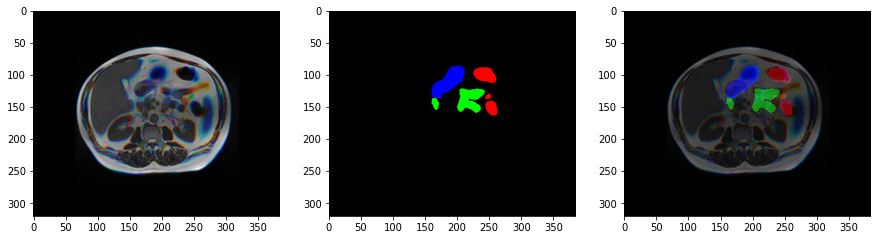

In [58]:
import matplotlib.pyplot as plt

##### @Document: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
##### Functions:
##### API: matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)[source]
##### figsize: Width, height in inches.


plt.figure(figsize=(15, 5))

imgs = np.load(f'{IMAGE_DIR}/case123_day0_slice_0080.npy').astype('float32')
imgs/=imgs.max(axis=(0,1))

##### subplot: Add an Axes to the current figure or retrieve an existing Axes.
##### subplot(nrows, ncols, index, **kwargs
##### subplot(pos, **kwargs)
plt.subplot(1, 3, 1)
##### imshow: Display data as an image, i.e., on a 2D regular raster.
plt.imshow(imgs)

msk = np.load(f'{MASK_DIR}/case123_day0_slice_0080.npy').astype('float32')
msk/=255.0

plt.subplot(1, 3, 2)
plt.imshow(msk)


plt.subplot(1, 3, 3)
plt.imshow(imgs)
plt.imshow(msk, alpha=0.5)


In [ ]:
df.to_csv('train.csv',index=False)

## Another 2.5D approach
New Luminide template: LB score 0.867 : https://www.kaggle.com/competitions/uw-madison-gi-tract-image-segmentation/discussion/327166    


I guess it is not easy to achieve this "out of the box", as it is not a standard RGB image. You may try to color each of the channels with different RGB range or use different alpha values, and then somehow fuse into a regular 3-channel image.      

Usually the input layer of the pre-trained networks (using imagenet) include 3 or 1 channels for RGB and grayscale images. How does changing the number of channels from 3 (as @awsaf49 did) to 5 (as you did) impacts the weights of the network? (especially in the first layer).           

@molaee, great question! My understanding is that the pretrained weights on the first conv layer get repeated and then scaled down. For example, if the pretrained weights are for 3 channels and we try to use them with 6 channels, they get duplicated once and then multiplied by 0.5.    

I would assume that SMP automatically gets this feature from the timm library that it uses internally.
@rwightman or @pavel92 might be able to confirm.    
  

code: https://github.com/luminide/example-gi-tract   

(t-2) + t + (t+2) 

In [60]:

import segmentation_models_pytorch as smp
model = smp.Unet(
            encoder_name='efficientnet-b0',
            encoder_weights=None, 
            in_channels=5,        
            classes=3,   
            activation=None,
        )


# part2: Generate 2.5D data for test  

In [67]:
sub_df = pd.read_csv('../input/uw-madison-gi-tract-image-segmentation/sample_submission.csv')
#### sub_first
sub_firset = True
sub_df = pd.read_csv('../input/uw-madison-gi-tract-image-segmentation/train.csv')
sub_df = sub_df[~sub_df.segmentation.isna()][:1000*3]
display(sub_df)
sub_df = sub_df.drop(columns=['class','segmentation']).drop_duplicates()
display(sub_df)

,id,class,segmentation
194,case123_day20_slice_0065,stomach,28094 3 28358 7 28623 9 28889 9 29155 9 29421 ...
197,case123_day20_slice_0066,stomach,27561 8 27825 11 28090 13 28355 14 28620 15 28...
200,case123_day20_slice_0067,stomach,15323 4 15587 8 15852 10 16117 11 16383 12 166...
203,case123_day20_slice_0068,stomach,14792 5 15056 9 15321 11 15587 11 15852 13 161...
206,case123_day20_slice_0069,stomach,14526 6 14789 12 15054 14 15319 16 15584 17 15...
...,...,...,...
10187,case88_day0_slice_0084,stomach,27933 6 28292 9 28650 13 29009 16 29368 19 297...
10188,case88_day0_slice_0085,large_bowel,21442 11 21801 13 21837 7 22160 17 22180 5 221...
10190,case88_day0_slice_0085,stomach,27933 5 28291 10 28649 14 29008 17 29366 21 29...
10191,case88_day0_slice_0086,large_bowel,21431 21 21790 24 21834 12 22150 62 22509 64 2...


,id
194,case123_day20_slice_0065
197,case123_day20_slice_0066
200,case123_day20_slice_0067
203,case123_day20_slice_0068
206,case123_day20_slice_0069
...,...
10179,case88_day0_slice_0082
10182,case88_day0_slice_0083
10185,case88_day0_slice_0084
10188,case88_day0_slice_0085


In [73]:

def get_metadata(row):
    data = row['id'].split('_')
    case = int(data[0].replace('case',''))
    day = int(data[1].replace('day',''))
    slice_ = int(data[-1])
    row['case'] = case
    row['day'] = day
    row['slice'] = slice_
    return row
sub_df = sub_df.apply(get_metadata, axis=1)
display(sub_df)

,id,case,day,slice
194,case123_day20_slice_0065,123,20,65
197,case123_day20_slice_0066,123,20,66
200,case123_day20_slice_0067,123,20,67
203,case123_day20_slice_0068,123,20,68
206,case123_day20_slice_0069,123,20,69
...,...,...,...,...
10179,case88_day0_slice_0082,88,0,82
10182,case88_day0_slice_0083,88,0,83
10185,case88_day0_slice_0084,88,0,84
10188,case88_day0_slice_0085,88,0,85


In [68]:
def path2info(row):
    path = row['image_path']
    data = path.split('/')
    slice_ = int(data[-1].split('_')[1])
    case = int(data[-3].split('_')[0].replace('case',''))
    day = int(data[-3].split('_')[1].replace('day',''))
    width = int(data[-1].split('_')[2])
    height = int(data[-1].split('_')[3])
    row['height'] = height
    row['width'] = width
    row['case'] = case
    row['day'] = day
    row['slice'] = slice_
    # row['id'] = f'case{case}_day{day}_slice_{slice_}'
    return row
paths = glob(f'../input/uw-madison-gi-tract-image-segmentation/train/**/*png',recursive=True)
path_df = pd.DataFrame(paths, columns=['image_path'])
path_df = path_df.apply(path2info, axis=1)
display(path_df)

,image_path,height,width,case,day,slice
0,../input/uw-madison-gi-tract-image-segmentatio...,310,360,49,15,49
1,../input/uw-madison-gi-tract-image-segmentatio...,310,360,49,15,70
2,../input/uw-madison-gi-tract-image-segmentatio...,310,360,49,15,59
3,../input/uw-madison-gi-tract-image-segmentatio...,310,360,49,15,20
4,../input/uw-madison-gi-tract-image-segmentatio...,310,360,49,15,60
...,...,...,...,...,...,...
38491,../input/uw-madison-gi-tract-image-segmentatio...,266,266,20,0,45
38492,../input/uw-madison-gi-tract-image-segmentatio...,266,266,20,0,91
38493,../input/uw-madison-gi-tract-image-segmentatio...,266,266,20,0,31
38494,../input/uw-madison-gi-tract-image-segmentatio...,266,266,20,0,107


In [76]:
test_df = sub_df.merge(path_df, on=['case','day','slice'], how='left')
# 2.5D MetaData
channels=3
stride=2
for i in range(channels):
    test_df[f'image_path_{i:02}'] = test_df.groupby(['case','day'])['image_path'].shift(-i*stride).fillna(method="ffill")
test_df['image_paths'] = test_df[[f'image_path_{i:02d}' for i in range(channels)]].values.tolist()
display(test_df)


,id,case,day,slice,image_path,height,width,image_path_00,image_path_01,image_path_02,image_paths
0,case123_day20_slice_0065,123,20,65,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
1,case123_day20_slice_0066,123,20,66,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
2,case123_day20_slice_0067,123,20,67,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
3,case123_day20_slice_0068,123,20,68,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
4,case123_day20_slice_0069,123,20,69,../input/uw-madison-gi-tract-image-segmentatio...,266,266,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
...,...,...,...,...,...,...,...,...,...,...,...
1424,case88_day0_slice_0082,88,0,82,../input/uw-madison-gi-tract-image-segmentatio...,310,360,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
1425,case88_day0_slice_0083,88,0,83,../input/uw-madison-gi-tract-image-segmentatio...,310,360,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
1426,case88_day0_slice_0084,88,0,84,../input/uw-madison-gi-tract-image-segmentatio...,310,360,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
1427,case88_day0_slice_0085,88,0,85,../input/uw-madison-gi-tract-image-segmentatio...,310,360,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,../input/uw-madison-gi-tract-image-segmentatio...,[../input/uw-madison-gi-tract-image-segmentati...
